In [1]:
%matplotlib inline

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk

from scipy import optimize

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
IBM = pd.read_csv('IBM.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)

In [34]:
returns = (IBM['Close']-IBM['Open']).resample('D').mean()
returns = series.fillna(series.bfill())
returns = returns['2017':]

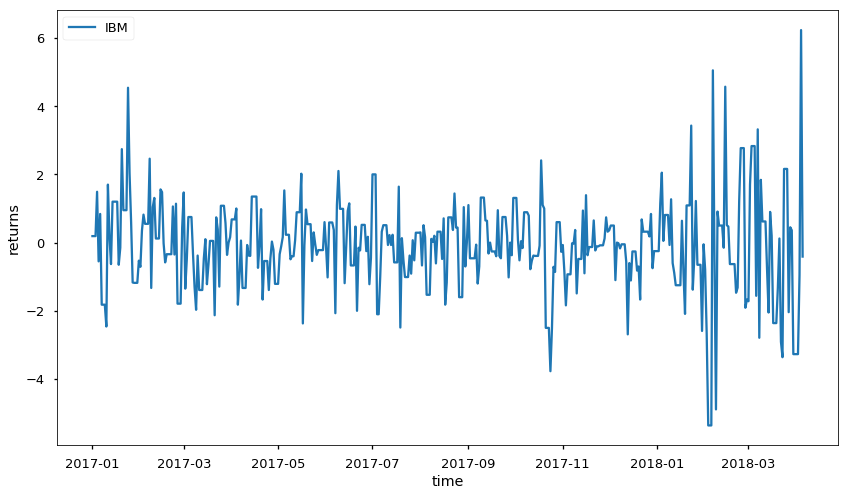

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(returns, label='IBM')
ax.set(xlabel='time', ylabel='returns')
ax.legend();

In [5]:
def predict(param):
    s = np.random.normal(param['s'][-1], 1/param['sigma'])
    return(y)

In [6]:
def pre(i):
    with pm.Model() as model:
        sigma = pm.Exponential('sigma', 50.)
        nu = pm.Exponential('nu', .1)
        s = GaussianRandomWalk('s', sd=sigma**-2, shape=100)
        volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s))
        r = pm.StudentT('r', nu=nu, lam=1/volatility_process, observed=re[i:(i+100)])
        trace = pm.sample(tune=2000, nuts_kwargs=dict(target_accept=.9))
    y = 0
    for i in range(0,500):
        y = y + predict(trace[i])
    return(y/500)

In [37]:
with pm.Model() as model:
    sigma = pm.Exponential('sigma', 50.)
    nu = pm.Exponential('nu', .1)
    s = GaussianRandomWalk('s', sd=sigma**-2, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s))
    r = pm.StudentT('r', nu=nu, lam=1/volatility_process, observed=returns)

In [38]:
with model:
    trace = pm.sample(tune=2000, nuts_kwargs=dict(target_accept=.9))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, nu_log__, sigma_log__]
100%|██████████| 2500/2500 [00:34<00:00, 71.86it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


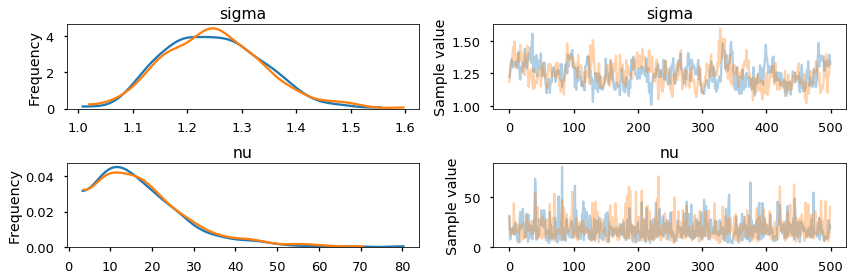

In [16]:
pm.traceplot(trace, varnames=['sigma', 'nu']);

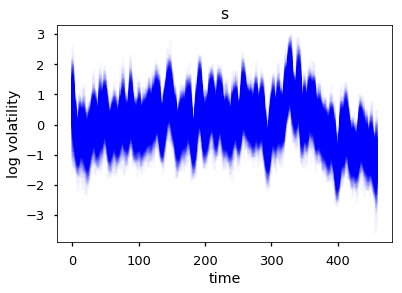

In [22]:
fig, ax = plt.subplots()

plt.plot(trace['s'].T, 'b', alpha=.03);
ax.set(title=str(s), xlabel='time', ylabel='log volatility');

In [39]:
returns.shape

(460,)

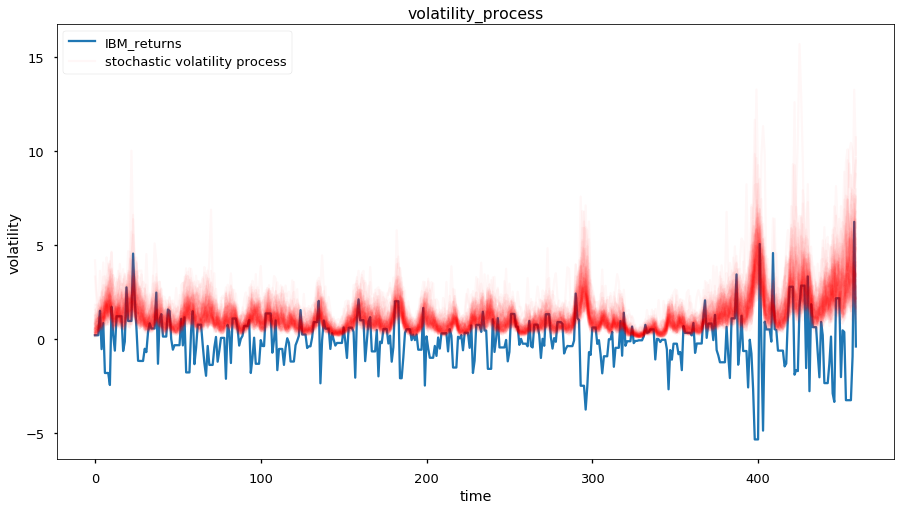

In [40]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(range(460), returns)
ax.plot(1/np.exp(trace['s',::10].T), 'r', alpha=.03);
ax.set(title='volatility_process', xlabel='time', ylabel='volatility');
ax.legend(['IBM_returns', 'stochastic volatility process'])
plt.savefig('SV_short.png', dpi=200)